## Abstract

Ovde treba jako kratak opis problema i šta se radilo

# Problem


Problem is to determinate changes of riverbed on profile, to find out if is erosion or deposition happening on riverbed. Data for this analysis were surveyed data, profiles Problem was to compare surveyd profile data from different years, because evry survey is close but not exactly on profile line. 

# Steps in Solution

0. Importing needed moduls 
<br>
1. Loading survey data
<br>
2. Transforming raw survey data
<br>
3. Transforming data for comparison
<br>
4. Visual comparison of profiles in line
<br>
5. Calculating area under reference plane
<br>
6. Calculating changes betwin years and visualisating resolts
<br>



## 0. Used moduls

In [3]:
import pandas as pd
import numpy as np 
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import scipy.interpolate
import scipy.integrate

## 1. Loading survey data

### Imoprting survey data
Importing survey data in different dataframes.

In [4]:
df_2004 = pd.read_excel ('Profile_1747.xlsx', sheet_name='2004')
df_2014 = pd.read_excel ('Profile_1747.xlsx', sheet_name='2014')
df_2016 = pd.read_excel ('Profile_1747.xlsx', sheet_name='2016')
df_2018 = pd.read_excel ('Profile_1747.xlsx', sheet_name='2018')
df_2020 = pd.read_excel ('Profile_1747.xlsx', sheet_name='2020')

In [5]:
# for quick control
#df_2004

### Start and end point of profile
Loading predetermined start and end points of profile

In [6]:
profile = [[441157.38,4946039.62],[440862.85,4945443.79]]

### Visualisation of raw survey data
Raw data - data before any transformation

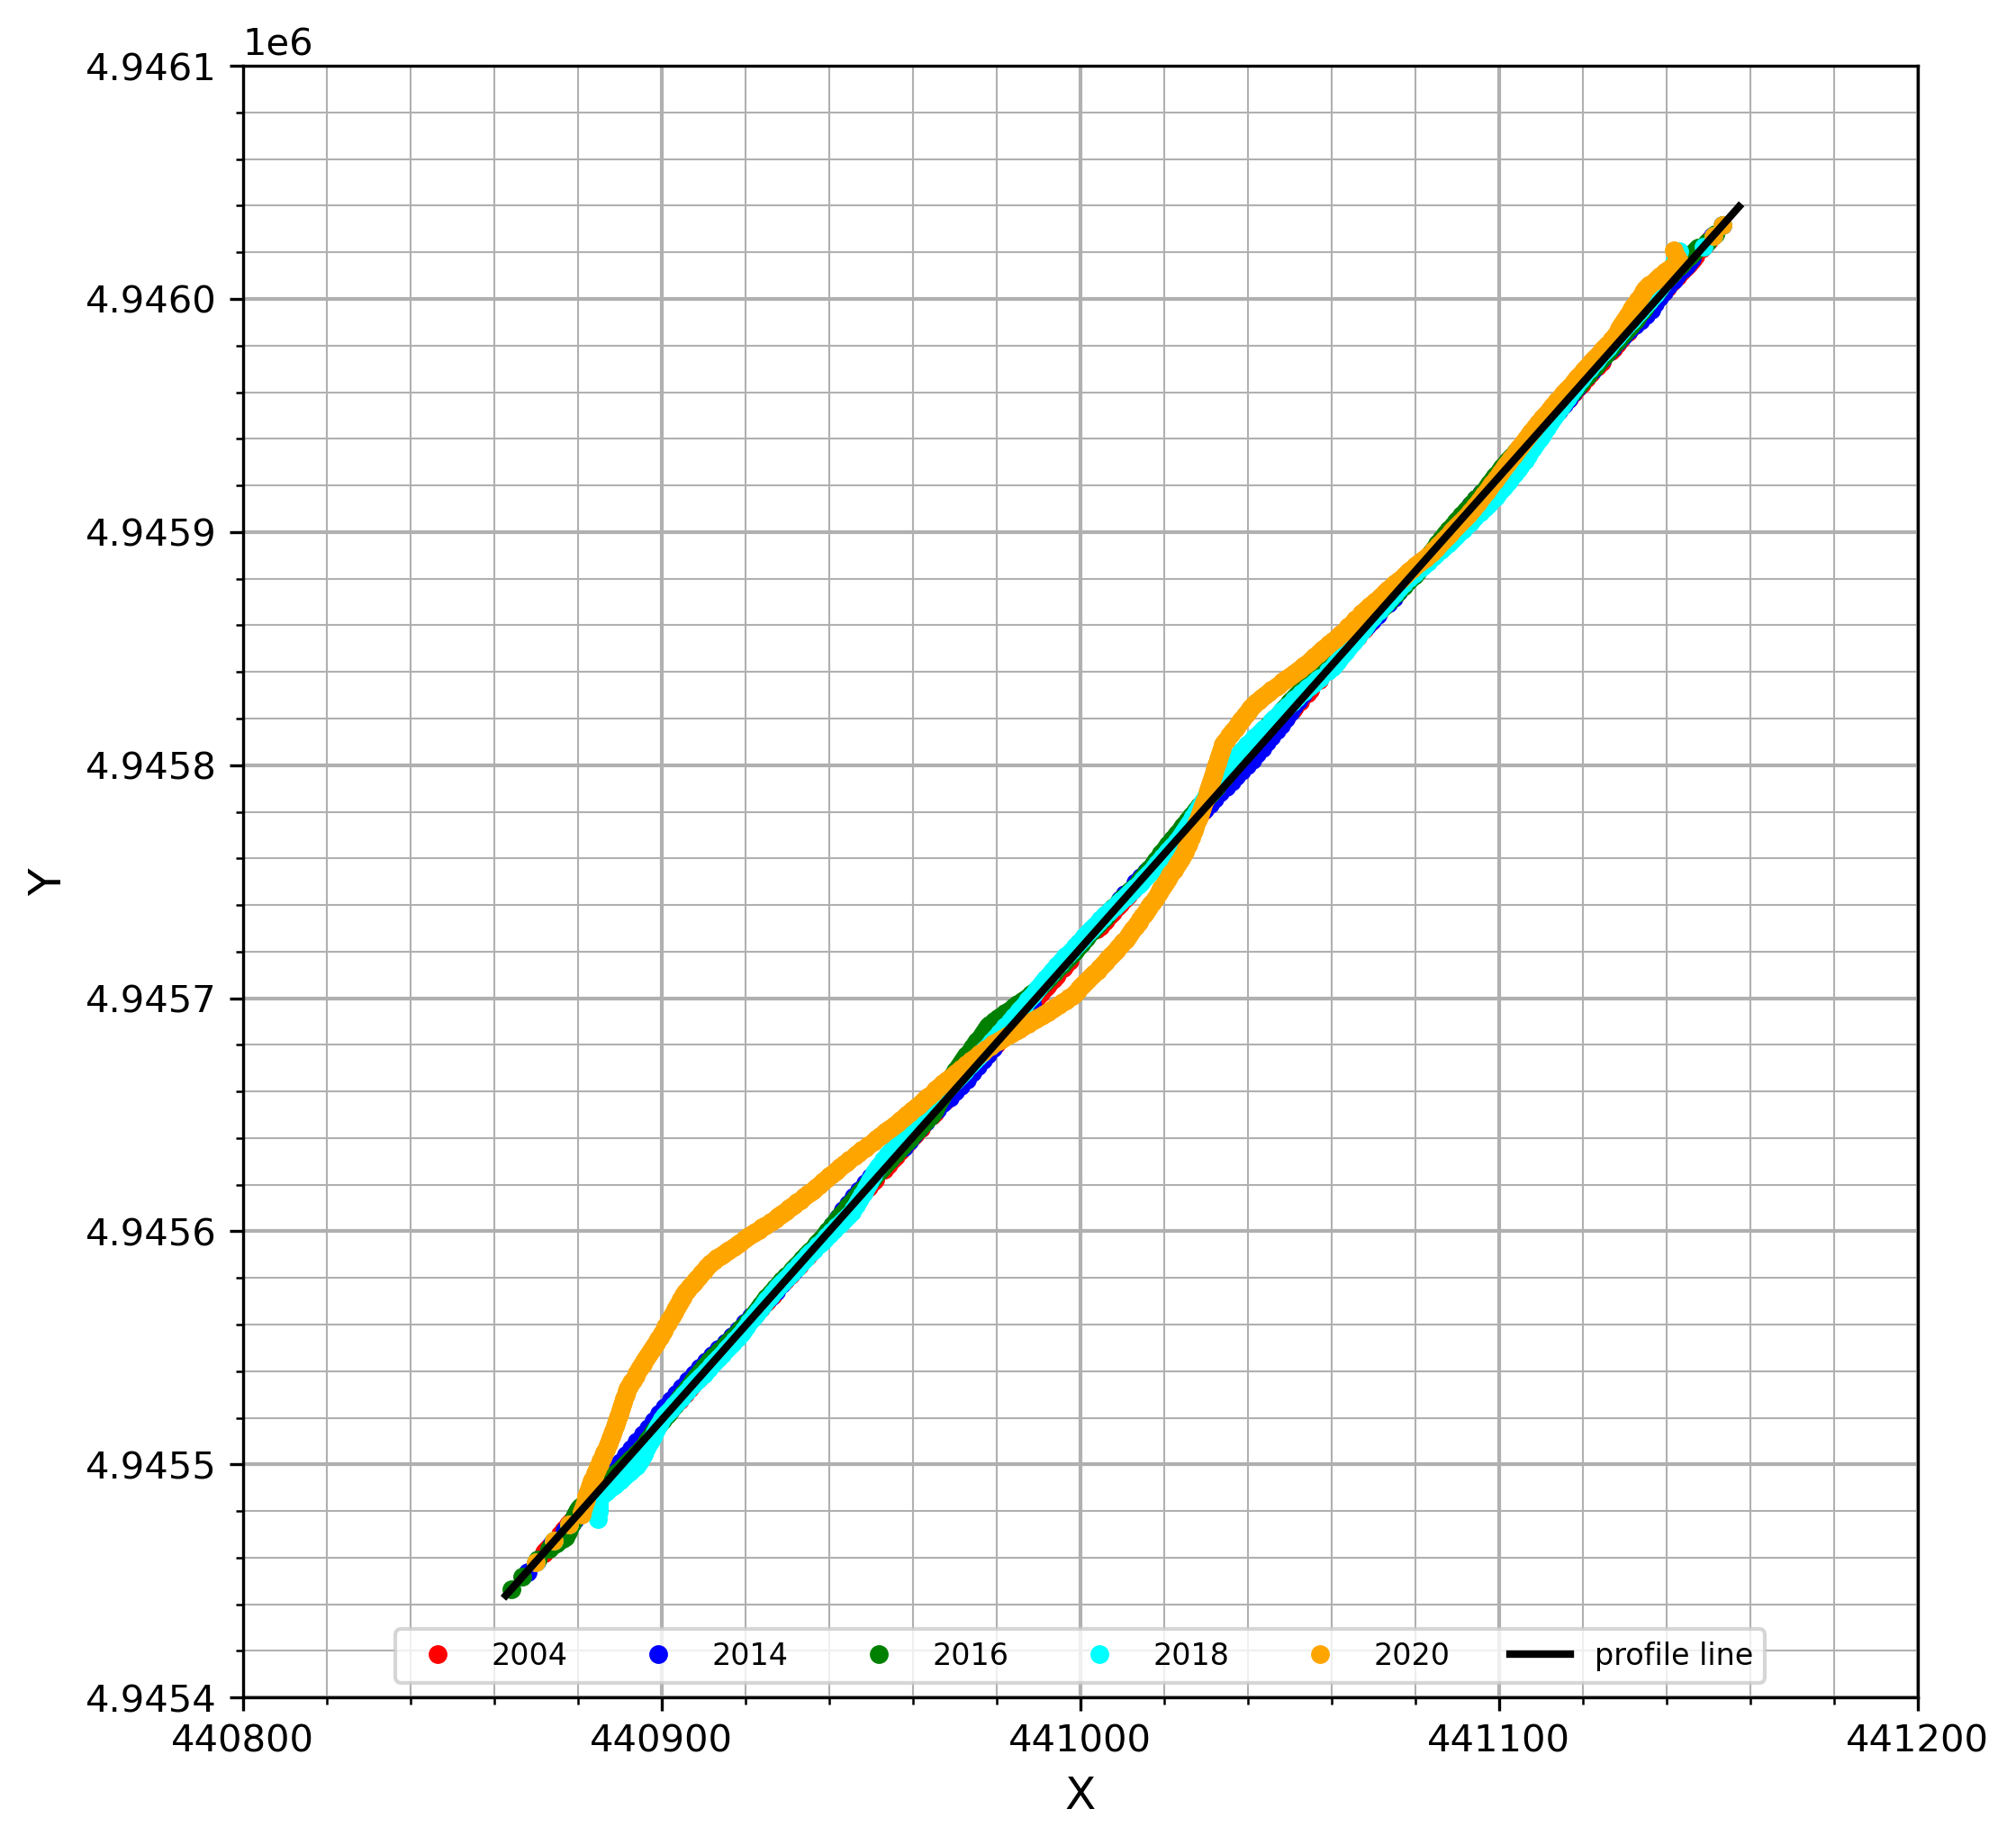

In [7]:
# data for visualisation
#2004
x_2004 = df_2004['X'].to_numpy()
y_2004 = df_2004['Y'].to_numpy()
#2014
x_2014 = df_2014['X'].to_numpy()
y_2014 = df_2014['Y'].to_numpy()
#2016
x_2016 = df_2016['X'].to_numpy()
y_2016 = df_2016['Y'].to_numpy()
#2018
x_2018 = df_2018['X'].to_numpy()
y_2018 = df_2018['Y'].to_numpy()
#2020
x_2020 = df_2020['X'].to_numpy()
y_2020 = df_2020['Y'].to_numpy()
#profile line (pl)
x_pl = [profile[0][0],profile[1][0]] 
y_pl = [profile[0][1],profile[1][1]]

#figure
fig = plt.figure(figsize = (8,8), dpi=300)
ax = fig.add_subplot()

ax.plot(x_2004, y_2004, 'o', label = '2004', color='red', markersize=4)
ax.plot(x_2014, y_2014, 'o', label = '2014', color='blue', markersize=4)
ax.plot(x_2016, y_2016, 'o', label = '2016', color='green', markersize=4)
ax.plot(x_2018, y_2018, 'o', label = '2018', color='cyan', markersize=4)
ax.plot(x_2020, y_2020, 'o', label = '2020', color='orange', markersize=4)
ax.plot(x_pl, y_pl, linewidth=2, label = 'profile line', color='black')

ax.set_xlim(440800, 441200)
ax.set_ylim(4945400, 4946100)
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_minor_locator(AutoMinorLocator(5)) 
ax.yaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(AutoMinorLocator(5)) 
ax.tick_params(which='major', labelsize=10) 
ax.set_xlabel('X', fontsize=12) 
ax.set_ylabel('Y', fontsize=12)
ax.grid(visible=True, which='major', linewidth=1)
ax.grid(visible=True, which='minor', linewidth=0.5)

ax.legend(loc= 'lower center', fontsize=8, ncol=6)

## 2. Transforming raw survey data
In this step all surveyd points, of all years are projected on predetermined profile. When all survey data are projected on same profile line we can compare surveys from different years

### Defining function to find projection on the profile line

In [8]:
def point_on_line(a, b, p):
    # a is starting point of profile line
    # b is end point of profile line
    # p is survey point in format [x coordinate, y coordinate]
    # projecting p on profile line
    ap = p - a
    ab = b - a
    result = a + np.dot(ap, ab) / np.dot(ab, ab) * ab
    return result

### Projecting (transforming) survey data on profile line

In [9]:
# all df in one list
all_data = [df_2004, df_2014, df_2016, df_2018, df_2020]

# start and end point of profile
start = np.array(profile[0])
end = np.array(profile[1])

# calculating for all df
for df in all_data:
        df['X_onProf'] = 0.00
        df['X_onProf'] = 0.00
        for n,(index,row) in enumerate(df.iterrows()):
            tx = df.loc[(int(index)), 'X']
            ty = df.loc[(int(index)), 'Y']  
            t = np.array([tx, ty])
            r = point_on_line(start, end, t)
            df.at[index,'X_onProf'] = r[0]
            df.at[index,'Y_onProf'] = r[1]


In [10]:
# for quick control
#df_2014

### Visualisation of data projected on profile line

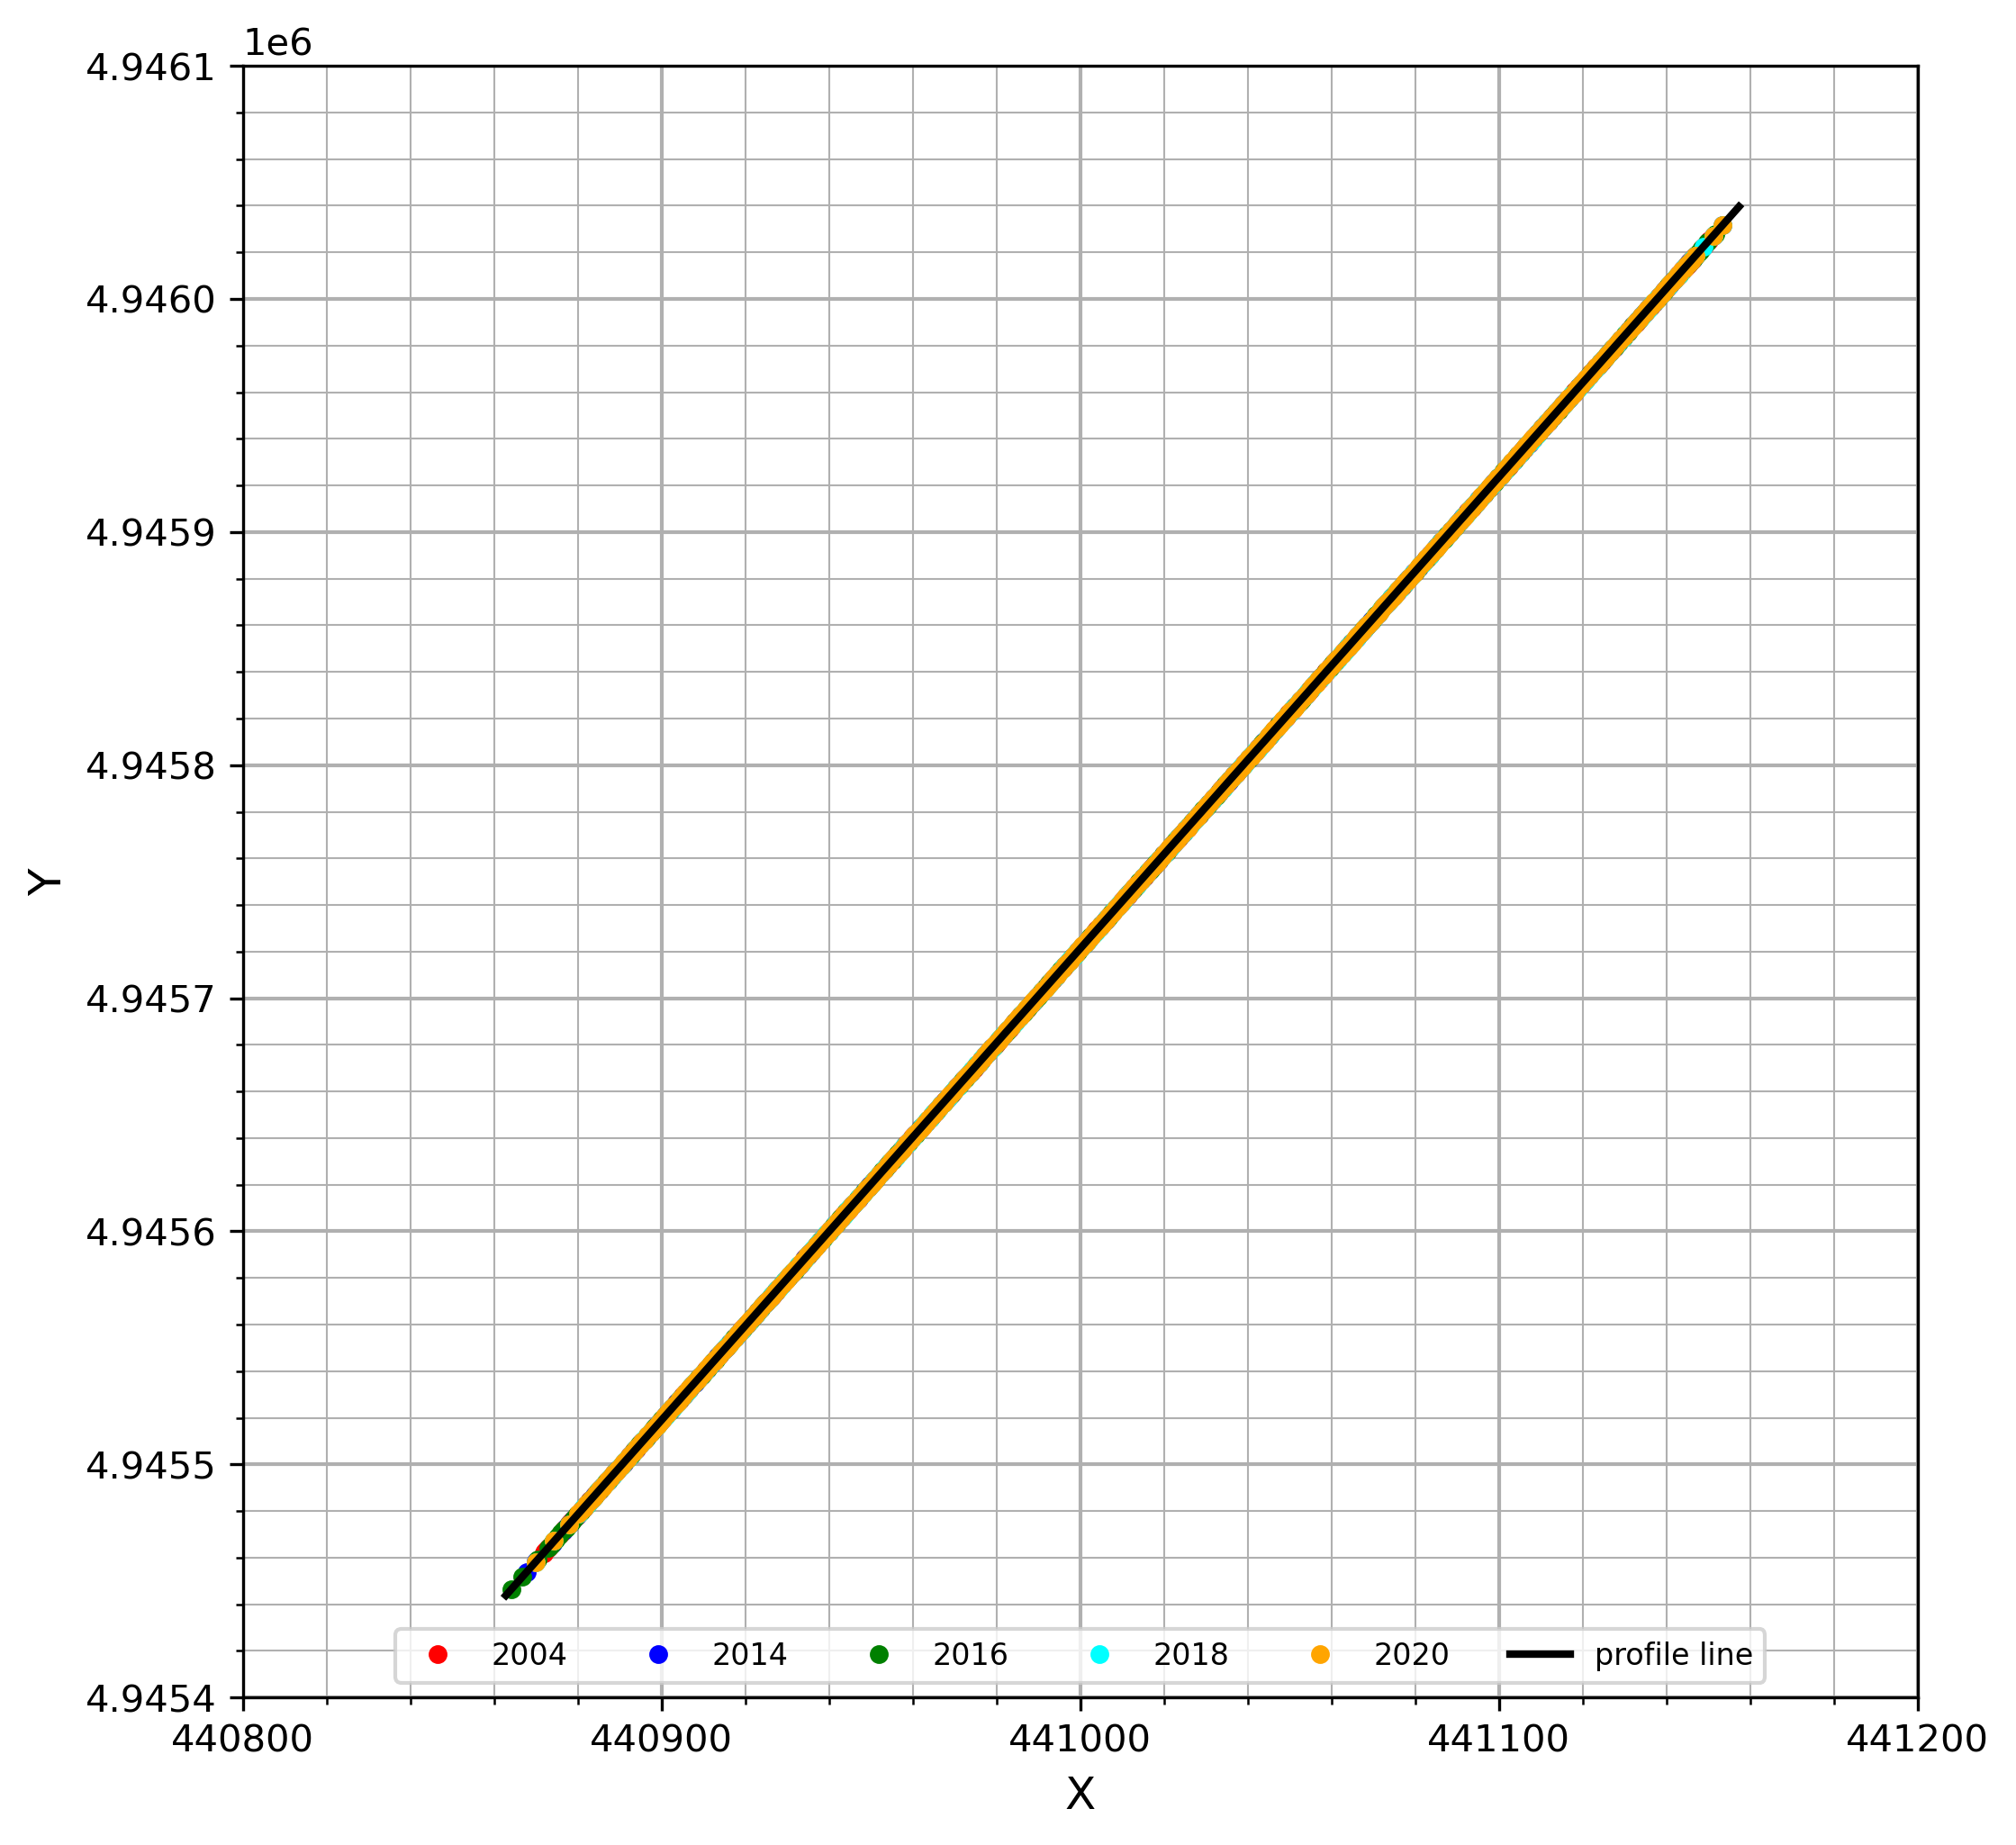

In [11]:
# data for visualisation
#2004
x_2004 = df_2004['X_onProf'].to_numpy()
y_2004 = df_2004['Y_onProf'].to_numpy()
#2014
x_2014 = df_2014['X_onProf'].to_numpy()
y_2014 = df_2014['Y_onProf'].to_numpy()
#2016
x_2016 = df_2016['X_onProf'].to_numpy()
y_2016 = df_2016['Y_onProf'].to_numpy()
#2018
x_2018 = df_2018['X_onProf'].to_numpy()
y_2018 = df_2018['Y_onProf'].to_numpy()
#2020
x_2020 = df_2020['X_onProf'].to_numpy()
y_2020 = df_2020['Y_onProf'].to_numpy()
#profile line (pl)
x_pl = [profile[0][0],profile[1][0]] 
y_pl = [profile[0][1],profile[1][1]]

#figure
fig = plt.figure(figsize = (8,8), dpi=300)
ax = fig.add_subplot()

ax.plot(x_2004, y_2004, 'o', label = '2004', color='red', markersize=4)
ax.plot(x_2014, y_2014, 'o', label = '2014', color='blue', markersize=4)
ax.plot(x_2016, y_2016, 'o', label = '2016', color='green', markersize=4)
ax.plot(x_2018, y_2018, 'o', label = '2018', color='cyan', markersize=4)
ax.plot(x_2020, y_2020, 'o', label = '2020', color='orange', markersize=4)
ax.plot(x_pl, y_pl, linewidth=2, label = 'profile line', color='black')

ax.set_xlim(440800, 441200)
ax.set_ylim(4945400, 4946100)
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_minor_locator(AutoMinorLocator(5)) 
ax.yaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(AutoMinorLocator(5)) 
ax.tick_params(which='major', labelsize=10) 
ax.set_xlabel('X', fontsize=12) 
ax.set_ylabel('Y', fontsize=12)
ax.grid(visible=True, which='major', linewidth=1)
ax.grid(visible=True, which='minor', linewidth=0.5)

ax.legend(loc= 'lower center', fontsize=8, ncol=6)

## 3. Transforming data for  comparison
In this step point data is transform from XYZ system to new coordinate system where starting point of profile is Xcom = 0. Xcom is caluleted based on X and Y coordinates. 

In [12]:
for df in all_data:
        df['X_com'] = 0.00
        for i,(index,row) in enumerate(df.iterrows()):
            if i == 0: continue
            a = df.loc[(int(index) - 1), 'X_onProf']
            b = df.loc[(int(index)), 'X_onProf']
            c = df.loc[(int(index) - 1), 'Y_onProf']
            d = df.loc[(int(index)), 'Y_onProf']
            e = math.sqrt((a-b)**2 + (c-d)**2)
            f = df.loc[(int(index) - 1), 'X_com' ]
            df.at[index,'X_com'] = e + f

In [13]:
# for quick control
df_2014

,X,Y,Z,X_onProf,Y_onProf,X_com
0,441153.35,4946031.63,72.16,441153.414606,4.946032e+06,0.000000
1,441151.16,4946027.14,70.87,441151.200905,4.946027e+06,4.995548
2,441146.17,4946017.25,67.21,441146.292222,4.946017e+06,16.072731
3,441145.47,4946015.77,66.74,441145.566834,4.946016e+06,17.709678
4,441144.87,4946014.37,66.60,441144.892863,4.946014e+06,19.230596
...,...,...,...,...,...,...
193,440877.95,4945472.86,68.48,440877.363227,4.945473e+06,622.951479
194,440876.91,4945471.43,68.69,440876.590937,4.945472e+06,624.694270
195,440873.94,4945466.31,69.31,440873.973801,4.945466e+06,630.600229
196,440870.12,4945458.37,70.88,440870.069507,4.945458e+06,639.410857


## 4. Visual comparison of profiles in line

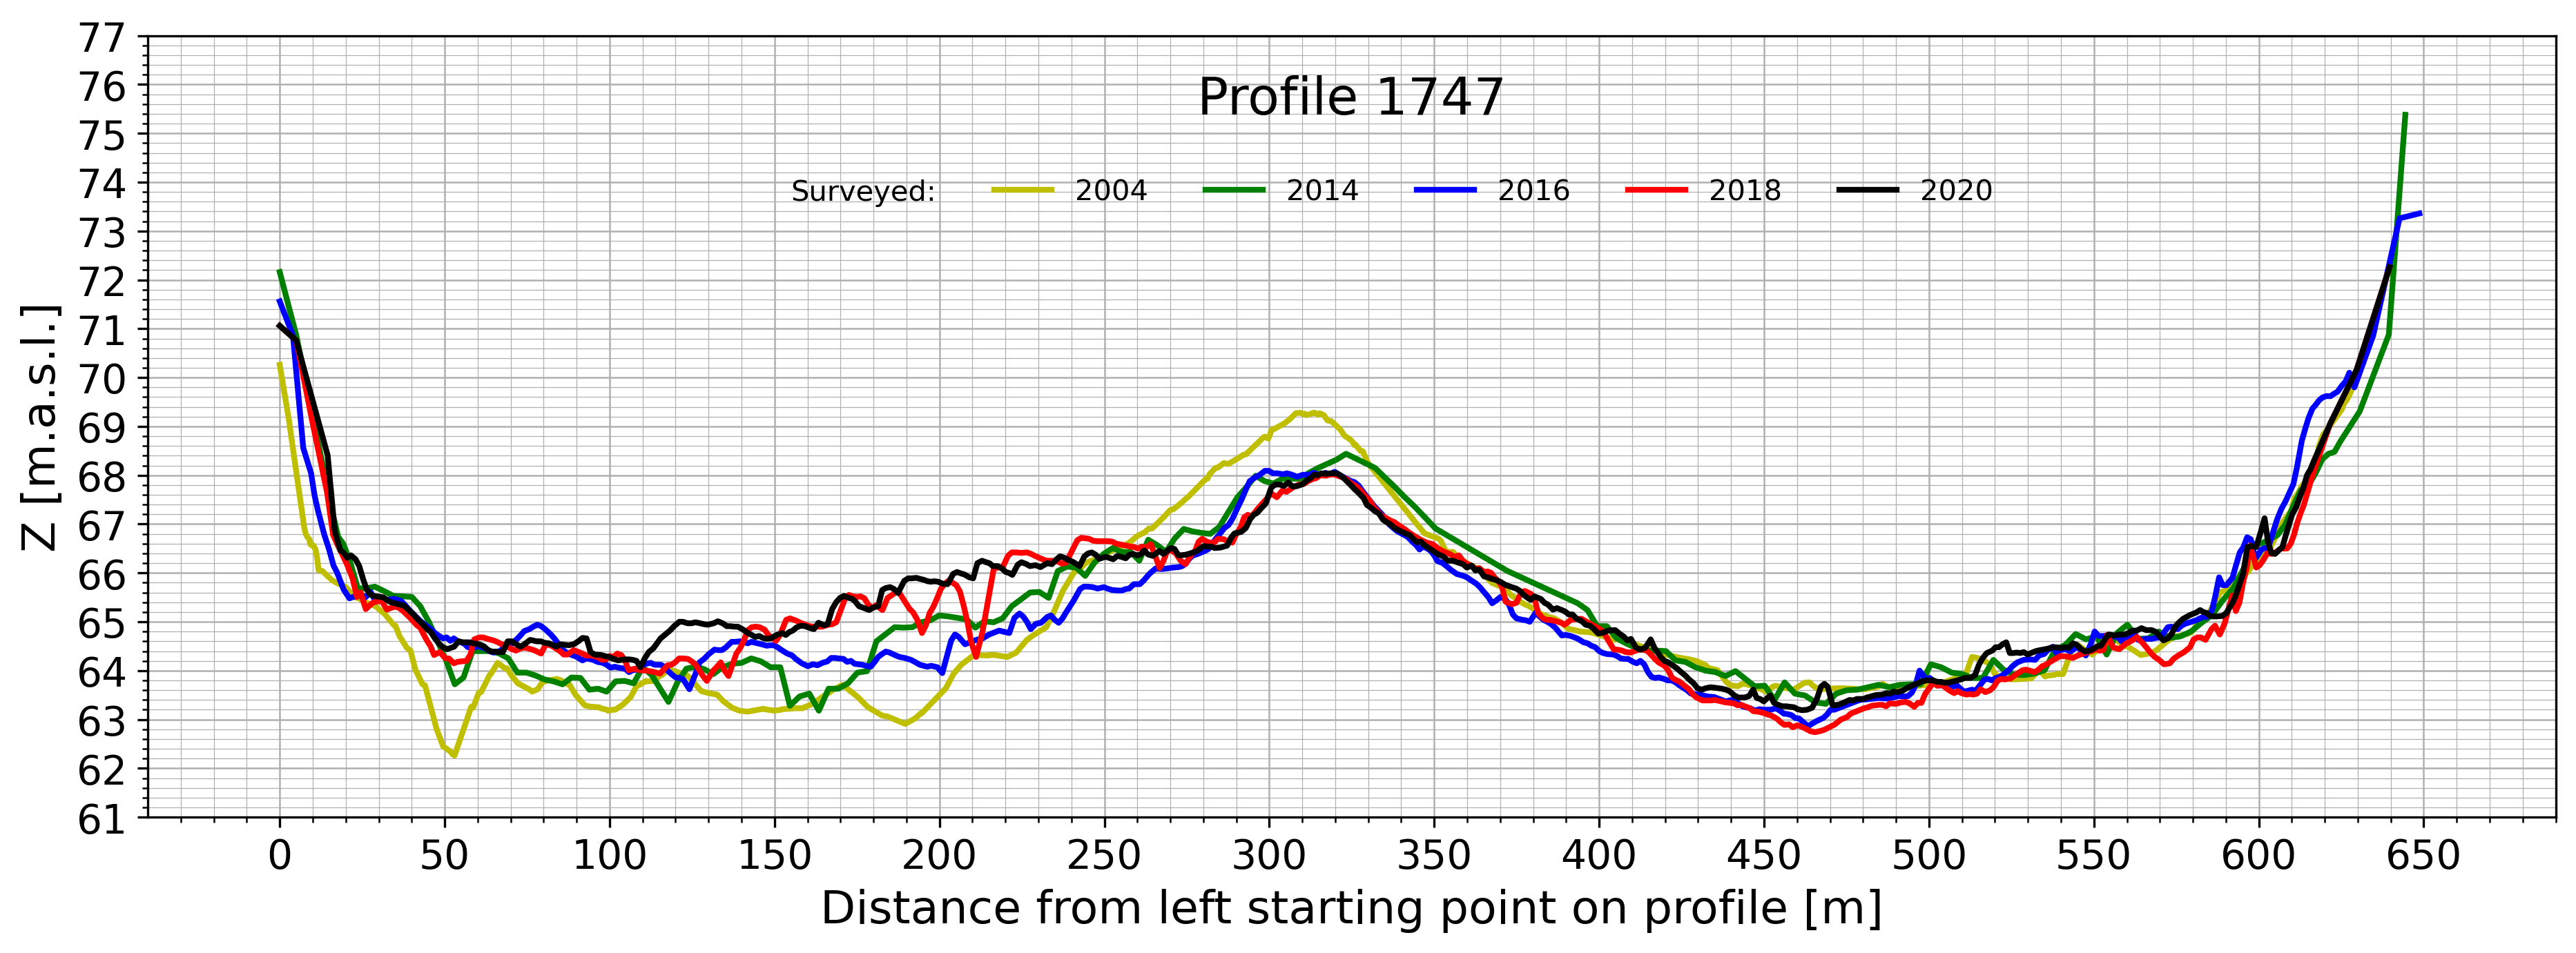

In [14]:
#2004
X_2004 = df_2004['X_com'].to_numpy()
Z_2004 = df_2004['Z'].to_numpy()
#2014
X_2014 = df_2014['X_com'].to_numpy()
Z_2014 = df_2014['Z'].to_numpy()
#2016
X_2016 = df_2016['X_com'].to_numpy()
Z_2016 = df_2016['Z'].to_numpy()
#2018
X_2018 = df_2018['X_com'].to_numpy()
Z_2018 = df_2018['Z'].to_numpy()
#2020
X_2020 = df_2020['X_com'].to_numpy()
Z_2020 = df_2020['Z'].to_numpy()

Xmax = max(max(X_2004), max(X_2014), max(X_2018), max(X_2020))
Zmax = max(max(Z_2004), max(Z_2014), max(Z_2018), max(Z_2020))
Xmin = min(min(X_2004), min(X_2014), min(X_2018), min(X_2020))
Zmin = min(min(Z_2004), min(Z_2014), min(Z_2018), min(Z_2020))

XminG = -40
XmaxG = (Xmax+49)//50*50 + 40
ZminG = round(Zmin-0.9)
ZmaxG = (Zmax+0.9999)//1 + 1

fig = plt.figure(figsize = (15,5), dpi=300)
ax = fig.add_subplot()

ax.plot([], [], ' ', label = 'Surveyed:')
ax.plot(X_2004, Z_2004, 'y', linewidth=2, label = '2004')
ax.plot(X_2014, Z_2014, 'g', linewidth=2, label = '2014')
ax.plot(X_2016, Z_2016, 'b', linewidth=2, label = '2016')
ax.plot(X_2018, Z_2018, 'r', linewidth=2, label = '2018')
ax.plot(X_2020, Z_2020, 'k', linewidth=2, label = '2020')

ax.set_xlim(XminG, XmaxG)
ax.set_ylim(ZminG, ZmaxG )

ax.xaxis.set_major_locator(MultipleLocator(50))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='major', labelsize=14)

ax.set_xlabel("Distance from left starting point on profile [m]", fontsize=16)
ax.set_ylabel("Z [m.a.s.l.]", fontsize=16)

ax.grid(visible=True, which='major', linewidth=0.6)
ax.grid(visible=True, which='minor', linewidth=0.3)

t = ax.text(0.5, 0.9 , 'Profile 1747', horizontalalignment='center', transform=ax.transAxes, fontsize=18)
ax.legend(bbox_to_anchor=(0.5, 0.85), loc= 'upper center', fontsize=10, ncol=6, frameon=False)

plt.show()

## 5. Calculating area under reference plane
To calculete changes in riverbed first we need to calculate area under reference plane for evry survey. In this case reference plane iz 69 m.a.s.l.

In [15]:
rp = 69 #reference plane in m.a.s.l.
years = [2004,2014,2016,2018,2020]
areas = []

In [16]:

for df in all_data:
    
   # Find intersection from profile in line and reference plane
    x = np.array(df['X_com'])
    len_x = len(x)
    z = np.array(df['Z'])
    
    df['Cross'] = rp 
    pre = np.array(df['Cross'])
    pre = pre[:len(x)]
    
    idx = np.argwhere(np.diff(np.sign(z - pre))).flatten()
    
    x1 = x[idx]
    z1 = z[idx]
    x2 = x[idx+1]
    z2 = z[idx+1]
    x3 = []
    z3 = []
    
    i = 0
    while i < len(idx):
        a = [x1[i],x2[i]]
        b = [z1[i],z2[i]]
        x_interp = scipy.interpolate.interp1d(b, a)
        c = float(x_interp(rp))
        x3.append(c)
        z3.append(rp)
        i +=1
    
    lub = idx+1
    lub = list(reversed(lub))
    x3 = list(reversed(x3))
    
    xrp = x
    zrp = z
    i = 0
    while i < len(lub):
        xrp=np.insert(xrp,lub[i] , x3[i])
        zrp=np.insert(zrp,lub[i] , z3[i])
        i+=1
    
    df_crp = pd.DataFrame() # crp - cross reference plane
    df_crp['X_cpr'] = xrp
    df_crp['Z_cpr'] = zrp
    
    # Area under reference plane
    z_rp = []
    for i in zrp: 
            if i > rp:
                p = 0
                z_rp.append(p)
            else:
                p = rp - i
                z_rp.append(p)
        
    area = np.trapz(z_rp, x=xrp)
    #rez = [area]
    areas.append(area)


    

In [1]:
# for quick checkig ressoults
#areas

### List of year and area

In [18]:
res_year_area = []  # resolts year and area
a = 0
for i in years:
    res_year_area.append([i,round(areas[a],2)])
    a = a + 1

res_year_area

[[2004, 2488.07],
 [2014, 2334.9],
 [2016, 2436.01],
 [2018, 2359.96],
 [2020, 2243.15]]

## 6. Calculating changes betwin years and visualisating resolts
In this step we are calculating defference betwin area under reference plane for differend surveys.  

### Calculating

In [32]:
periodOfTime = []
changes = []
n = 0 
while n < 4:
    # period of time
    pot = str(res_year_area[n][0]) + '-' + str(res_year_area[n+1][0])
    # change
    cha = res_year_area[n][1] - res_year_area[n+1][1]
    cha = round(cha, 2)
    
    periodOfTime.append(pot)
    changes.append(cha)

    n = n +1

In [35]:
print(periodOfTime)
print(changes)

['2004-2014', '2014-2016', '2016-2018', '2018-2020']
[153.17, -101.11, 76.05, 116.81]


### Visualisations

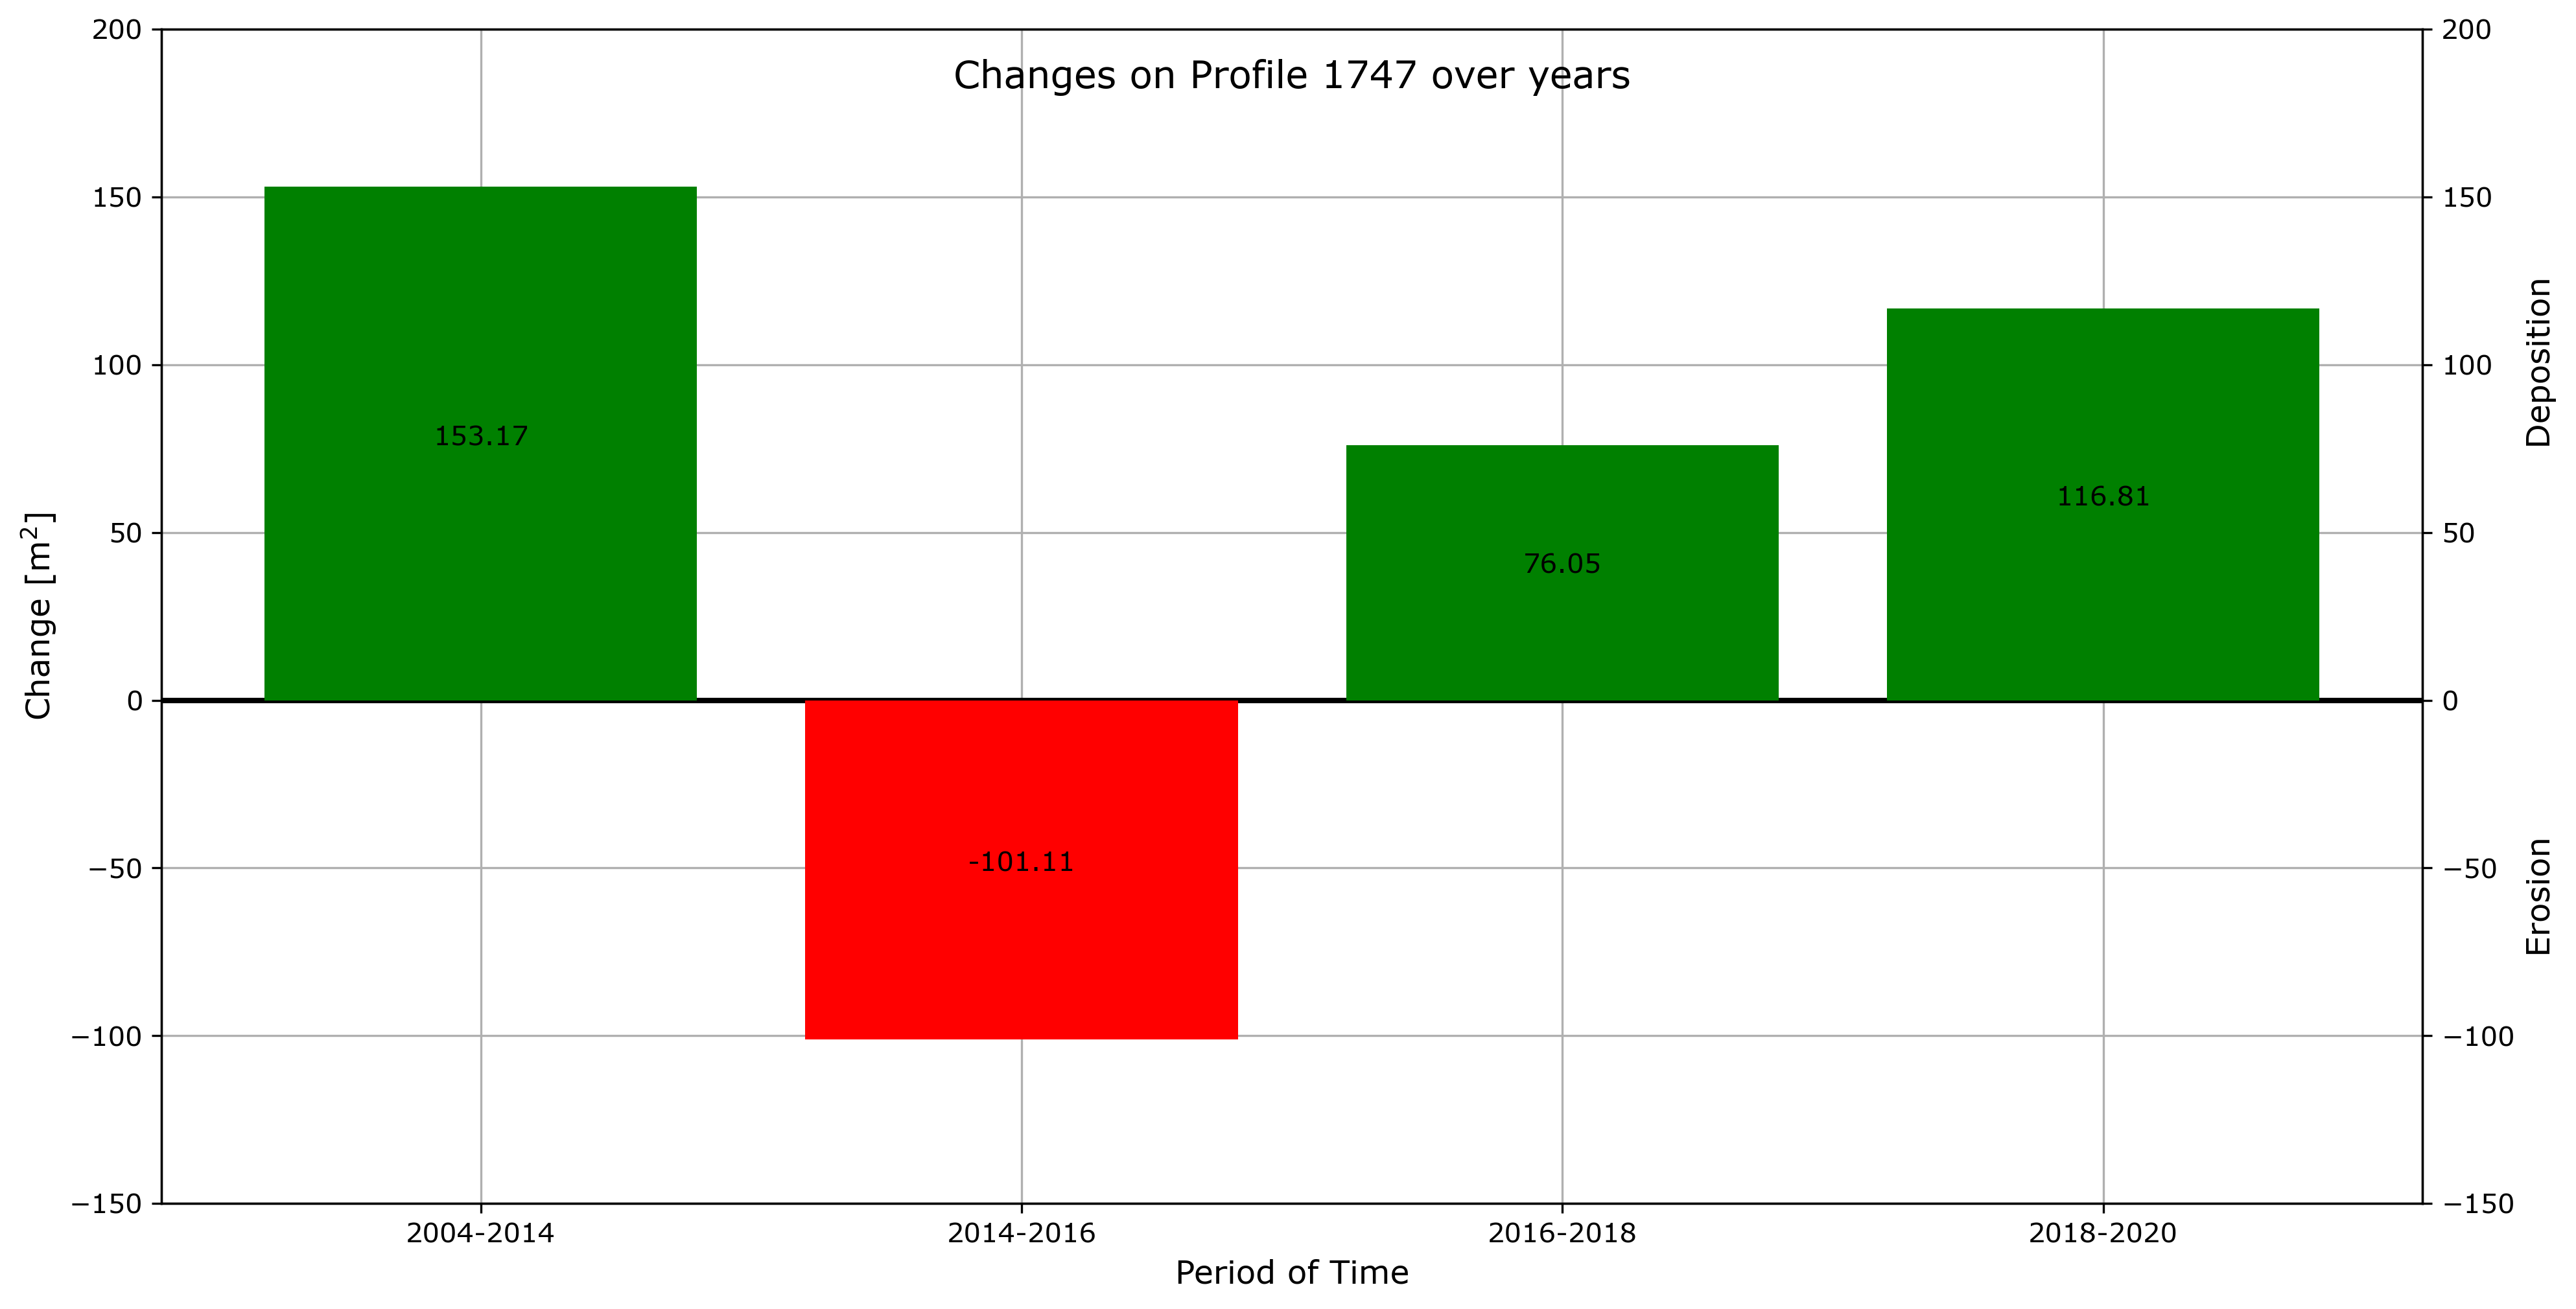

In [70]:
fig = plt.figure(figsize = (15,8), dpi=300)
ax = fig.add_subplot()

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

plt.rcParams["font.family"] = 'Verdana'

col = []
for i in changes:
    if i < 0:
        col.append('red')
    else:
        col.append('green')
        
ax.bar(periodOfTime, changes, color = col, zorder=3)
addlabels(periodOfTime, changes)
ax.set_ylim(-150, 200)

ax.set_xlabel("Period of Time", fontsize=12)
ax.set_ylabel("Change [$\mathregular{m^2}$]", fontsize=12)

ax.grid(zorder=0)

ax.axhline(0, color='black', linewidth=2)

title = "Changes on Profile 1747 over years"
t = ax.text(0.5, 0.95 , title,horizontalalignment='center', transform=ax.transAxes, fontsize=14)

ax2 = ax.twinx()
ax2.set_ylabel("Erosion                                  Deposition", fontsize=12)
ax2.set_ylim(-150, 200)

plt.show()  